In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')

In [ ]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.241670,1,2,0.651115,0.410606,-0.294289,0
1,1.176226,0,4,-1.658879,-0.805374,-0.784852,0
2,-1.310651,0,2,-1.081380,1.009204,1.422681,0
3,-0.525321,0,3,-1.370129,1.625597,0.173279,1
4,0.129120,0,3,0.939864,-0.341720,-0.064338,0


In [ ]:
df.shape

(100000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  float64
 1   Gender                      100000 non-null  int64  
 2   Location                    100000 non-null  int64  
 3   Subscription_Length_Months  100000 non-null  float64
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  float64
 6   Churn                       100000 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 5.3 MB


In [ ]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,1.000000e+05,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,-2.081890e-17,0.497840,1.995840,-7.602807e-18,-4.515499e-16,1.552536e-16,0.497790
std,1.000005e+00,0.499998,1.411638,1.000005e+00,1.000005e+00,1.000005e+00,0.499998
min,-1.703316e+00,0.000000,0.000000,-1.658879e+00,-1.732682e+00,-1.719987e+00,0.000000
5%,-1.572428e+00,0.000000,0.000000,-1.514504e+00,-1.558194e+00,-1.551356e+00,0.000000
25%,-8.525421e-01,0.000000,1.000000,-9.370056e-01,-8.656788e-01,-8.691672e-01,0.000000
50%,-1.768301e-03,0.000000,2.000000,-7.075799e-02,-2.135221e-03,-3.017344e-03,0.000000
75%,8.490055e-01,1.000000,3.000000,9.398642e-01,8.693172e-01,8.631325e-01,1.000000
90%,1.372559e+00,1.000000,4.000000,1.372988e+00,1.385367e+00,1.392021e+00,1.000000
95%,1.568891e+00,1.000000,4.000000,1.517363e+00,1.554912e+00,1.560651e+00,1.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Churn.unique()

array([0, 1])

In [ ]:
df = df.drop(columns=['CustomerID', 'Name'], axis=1)

In [ ]:
df = df.dropna()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Location'] = label_encoder.fit_transform(df['Location'])

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
df["Churn"].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

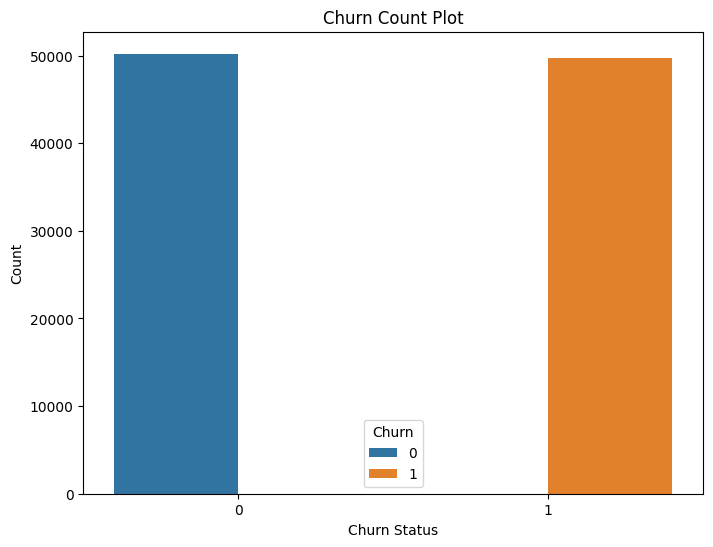

In [66]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df, x='Churn', hue='Churn')

plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Count Plot')

plt.show()

In [ ]:
df['Location'].value_counts()

1    20157
2    20041
3    20031
0    19958
4    19813
Name: Location, dtype: int64

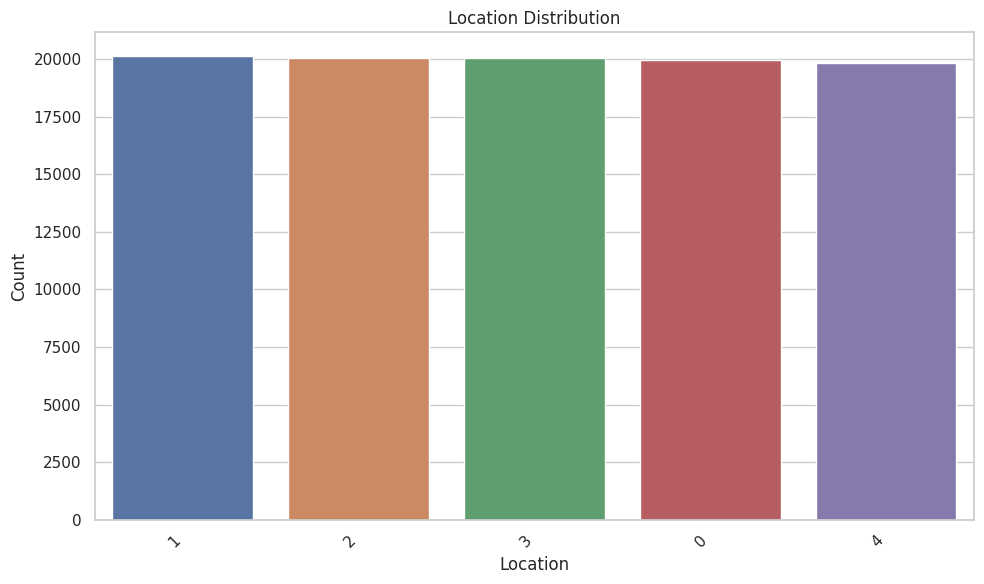

In [67]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)

plt.xticks(rotation=45, ha='right')

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Distribution')

plt.tight_layout()
plt.show()

In [ ]:
df['Gender'].value_counts()

0    50216
1    49784
Name: Gender, dtype: int64

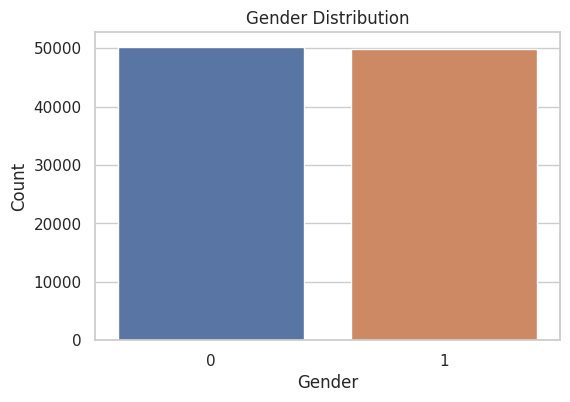

In [68]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.show()


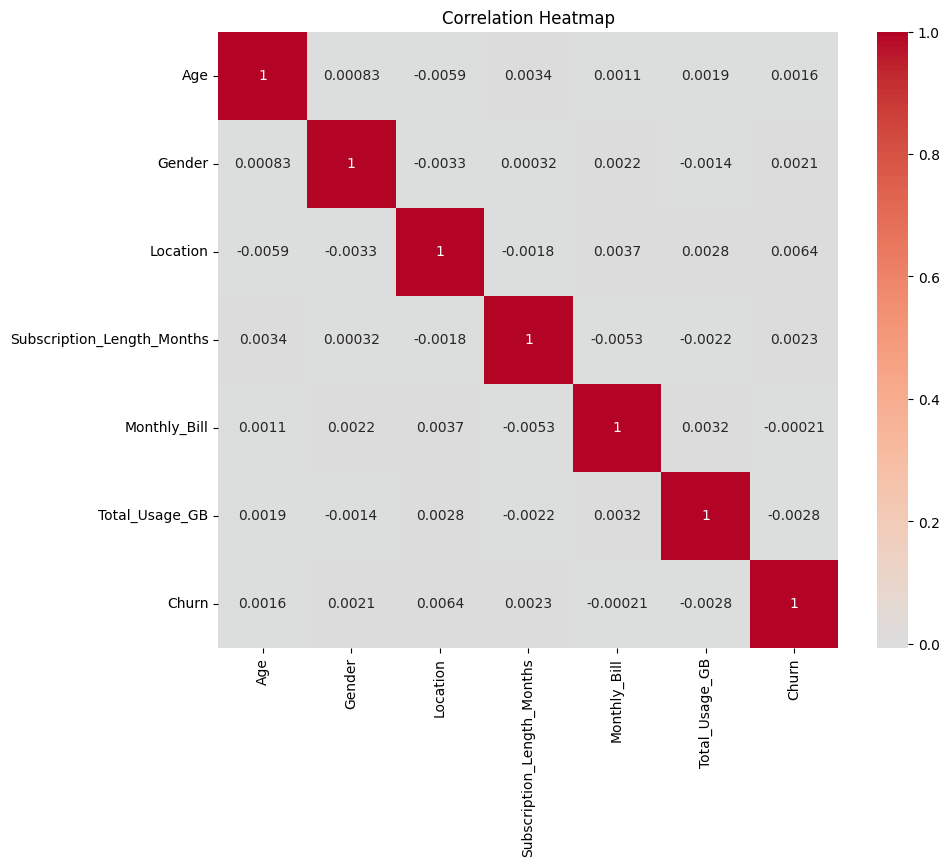

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap')

plt.show()

In [ ]:
columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
X_to_scale = df[columns_to_scale]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_to_scale), columns=columns_to_scale)
df[columns_to_scale] = X_scaled

In [ ]:
random_seed = 1

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=random_seed)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.51     10020
           1       0.50      0.47      0.48      9980

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

Confusion Matrix:
 [[5286 4734]
 [5326 4654]]


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model2 = LogisticRegression(random_state=random_seed)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.74      0.60     10020
           1       0.50      0.27      0.35      9980

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.50      0.50      0.47     20000

Confusion Matrix:
 [[7410 2610]
 [7321 2659]]


Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.7466 - accuracy: 0.5011 - val_loss: 0.7065 - val_accuracy: 0.5011
Epoch 2/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.7003 - accuracy: 0.4988 - val_loss: 0.6936 - val_accuracy: 0.5047
Epoch 3/10
2000/2000 [==============================] - 7s 4ms/step - loss: 0.6936 - accuracy: 0.4977 - val_loss: 0.6932 - val_accuracy: 0.4937
Epoch 4/10
2000/2000 [==============================] - 9s 4ms/step - loss: 0.6933 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5059
Epoch 5/10
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6933 - accuracy: 0.5034 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 6/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5072
Epoch 7/10
2000/2000 [==============================] - 8s 4ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy:

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred_nn = np.round(y_pred_probs).flatten()

625/625 [==============================] - 3s 4ms/step


In [ ]:
print("Neural Network - Classification Report:\n", classification_report(y_test, y_pred_nn))
print("Neural Network - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

Neural Network - Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67     10020
           1       0.00      0.00      0.00      9980

    accuracy                           0.50     20000
   macro avg       0.25      0.50      0.33     20000
weighted avg       0.25      0.50      0.33     20000

Neural Network - Confusion Matrix:
 [[10020     0]
 [ 9980     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

In [ ]:
model_nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = model_nb.predict(X_test)

In [ ]:
print("Naive Bayes - Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Naive Bayes - Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.74      0.60     10020
           1       0.50      0.26      0.35      9980

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.50      0.50      0.47     20000

Naive Bayes - Confusion Matrix:
 [[7384 2636]
 [7340 2640]]


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier(random_state=1)

In [ ]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y_pred_dt = model_dt.predict(X_test)

In [ ]:
print("Decision Tree - Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Decision Tree - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree - Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51     10020
           1       0.50      0.51      0.51      9980

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.51     20000
weighted avg       0.51      0.51      0.51     20000

Decision Tree - Confusion Matrix:
 [[5065 4955]
 [4934 5046]]


XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier(random_state=1)

In [ ]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)

In [ ]:
print("XGBoost - Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50     10020
           1       0.49      0.48      0.48      9980

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000

XGBoost - Confusion Matrix:
 [[5144 4876]
 [5234 4746]]


CATBoost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model_catboost = CatBoostClassifier(iterations=500, depth=8, learning_rate=0.1, loss_function='Logloss', random_seed=1)

In [ ]:
model_catboost.fit(X_train, y_train)

0:	learn: 0.6929795	total: 121ms	remaining: 1m
1:	learn: 0.6927934	total: 180ms	remaining: 44.8s
2:	learn: 0.6926360	total: 236ms	remaining: 39.1s
3:	learn: 0.6924520	total: 293ms	remaining: 36.4s
4:	learn: 0.6922836	total: 360ms	remaining: 35.6s
5:	learn: 0.6921362	total: 418ms	remaining: 34.4s
6:	learn: 0.6920395	total: 490ms	remaining: 34.5s
7:	learn: 0.6918940	total: 570ms	remaining: 35s
8:	learn: 0.6917273	total: 683ms	remaining: 37.3s
9:	learn: 0.6915027	total: 745ms	remaining: 36.5s
10:	learn: 0.6913082	total: 847ms	remaining: 37.7s
11:	learn: 0.6911124	total: 921ms	remaining: 37.4s
12:	learn: 0.6909675	total: 981ms	remaining: 36.7s
13:	learn: 0.6908047	total: 1.01s	remaining: 35.2s
14:	learn: 0.6906609	total: 1.04s	remaining: 33.7s
15:	learn: 0.6906610	total: 1.06s	remaining: 32s
16:	learn: 0.6905176	total: 1.09s	remaining: 31s
17:	learn: 0.6903722	total: 1.13s	remaining: 30.1s
18:	learn: 0.6901801	total: 1.15s	remaining: 29.2s
19:	learn: 0.6900377	total: 1.19s	remaining: 28.6s

In [ ]:
y_pred_catboost = model_catboost.predict(X_test)

In [ ]:
print("CatBoost - Classification Report:\n", classification_report(y_test, y_pred_catboost))
print("CatBoost - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))

CatBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.51     10020
           1       0.50      0.47      0.48      9980

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

CatBoost - Confusion Matrix:
 [[5305 4715]
 [5317 4663]]


Cross-Validation and Test Accuracy

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=1),
    'Logistic Regression': LogisticRegression(random_state=1),
    'Neural Network': MLPClassifier(random_state=1),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=1),
    'XGBoost': XGBClassifier(random_state=1),
    'CatBoost': CatBoostClassifier(random_state=1, verbose=0),
}

for name, clf in classifiers.items():
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{name} - Cross-Validation Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})')


for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    print(f'{name} - Test Accuracy: {accuracy:.4f}')

Random Forest - Cross-Validation Accuracy: 0.4979 (+/- 0.0029)
Logistic Regression - Cross-Validation Accuracy: 0.5008 (+/- 0.0042)
Neural Network - Cross-Validation Accuracy: 0.5000 (+/- 0.0021)
Naive Bayes - Cross-Validation Accuracy: 0.5003 (+/- 0.0016)
Decision Tree - Cross-Validation Accuracy: 0.4983 (+/- 0.0039)
XGBoost - Cross-Validation Accuracy: 0.5029 (+/- 0.0059)
CatBoost - Cross-Validation Accuracy: 0.4992 (+/- 0.0052)
Random Forest - Test Accuracy: 0.4970
Logistic Regression - Test Accuracy: 0.5034
Neural Network - Test Accuracy: 0.4986
Naive Bayes - Test Accuracy: 0.5012
Decision Tree - Test Accuracy: 0.5056
XGBoost - Test Accuracy: 0.4945
CatBoost - Test Accuracy: 0.4985


In [ ]:
import pickle

pickle.dump(rf, open("model.pkl", 'wb'))

NameError: ignored